In [30]:
D = {
  "Chimp": { "Chimp": 0, "Human": 3, "Seal": 6, "Whale": 4 },
  "Human": { "Chimp": 3, "Human": 0, "Seal": 7, "Whale": 5 },
  "Seal": { "Chimp": 6, "Human": 7, "Seal": 0, "Whale": 2 },
  "Whale": { "Chimp": 4, "Human": 5, "Seal": 2, "Whale": 0 }
}

In [31]:
adj = {
  "Chimp": ["A"],
  "Human": ["A"],
  "Seal": ["M"],
  "Whale": ["M"],
  "A": ["Chimp", "Human", "M"],
  "M": ["Seal", "Whale", "A"]
}
node_names = ["Chimp", "Human", "Seal", "Whale", "A", "M"]

In [32]:
distance = dict()
for i in node_names:
  distance[i] = dict()
  for j in node_names:
    if i in "AM" or j in "AM":
      distance[i][j] = 10000
    else:
      distance[i][j] = D[i][j]


In [33]:
# d[k][m] = (d[i][k] + d[j][k] - d[i][j]) / 2
distance["Seal"]["A"] = (D["Seal"]["Chimp"] + D["Seal"]["Human"] - D["Human"]["Chimp"]) / 2
distance["A"]["Seal"] = distance["Seal"]["A"]
distance["Whale"]["A"] = (D["Whale"]["Chimp"] + D["Whale"]["Human"] - D["Human"]["Chimp"]) / 2
distance["A"]["Whale"] = distance["Whale"]["A"] 
print(distance["Seal"]["A"], distance["Whale"]["A"])

5.0 3.0


In [34]:
distance["A"]["M"] = (distance["Seal"]["A"] + distance["Whale"]["A"] - D["Seal"]["Whale"]) / 2
distance["M"]["A"] = distance["A"]["M"]
print(distance["A"]["M"])
middle = distance["A"]["M"]

3.0


In [35]:
distance["Chimp"]["M"] = (distance["Chimp"]["Seal"] + distance["Chimp"]["Whale"] - D["Seal"]["Whale"]) / 2
distance["M"]["Chimp"] = distance["Chimp"]["M"]

distance["Chimp"]["A"] = distance["Chimp"]["M"] - distance["M"]["A"]

print(distance["Chimp"]["A"])

1.0


In [36]:
distance["Human"]["M"] = (distance["Human"]["Seal"] + distance["Human"]["Whale"] - D["Seal"]["Whale"]) / 2
distance["M"]["Human"] = distance["Human"]["M"]

distance["Human"]["A"] = distance["Human"]["M"] - distance["M"]["A"]
distance["A"]["Human"] = distance["Human"]["A"]

print(distance["Human"]["A"])

2.0


In [37]:
distance["Seal"]["M"] = distance["Seal"]["A"] - distance["A"]["M"]
distance["M"]["Seal"] = distance["Seal"]["M"]
distance["Whale"]["M"] = distance["Whale"]["A"] - distance["A"]["M"]
distance["M"]["Whale"] = distance["Whale"]["M"]

In [38]:
import json

In [39]:
print(json.dumps(
    distance,
    sort_keys=True,
    indent=2,
    separators=(',', ': ')
))

{
  "A": {
    "A": 10000,
    "Chimp": 10000,
    "Human": 2.0,
    "M": 3.0,
    "Seal": 5.0,
    "Whale": 3.0
  },
  "Chimp": {
    "A": 1.0,
    "Chimp": 0,
    "Human": 3,
    "M": 4.0,
    "Seal": 6,
    "Whale": 4
  },
  "Human": {
    "A": 2.0,
    "Chimp": 3,
    "Human": 0,
    "M": 5.0,
    "Seal": 7,
    "Whale": 5
  },
  "M": {
    "A": 3.0,
    "Chimp": 4.0,
    "Human": 5.0,
    "M": 10000,
    "Seal": 2.0,
    "Whale": 0.0
  },
  "Seal": {
    "A": 5.0,
    "Chimp": 6,
    "Human": 7,
    "M": 2.0,
    "Seal": 0,
    "Whale": 2
  },
  "Whale": {
    "A": 3.0,
    "Chimp": 4,
    "Human": 5,
    "M": 0.0,
    "Seal": 2,
    "Whale": 0
  }
}


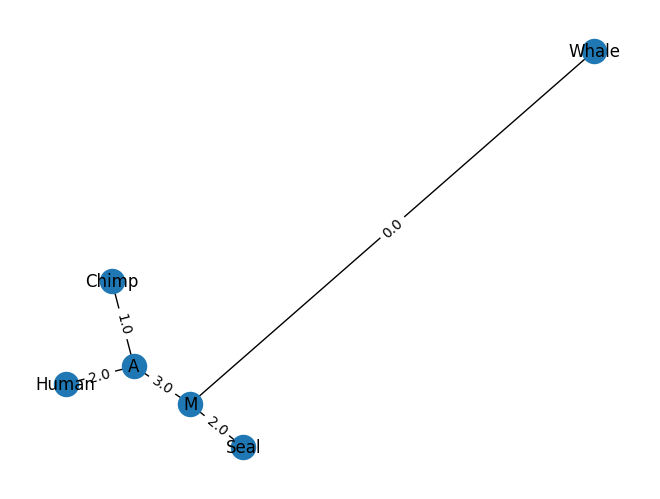

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in node_names:
  G.add_node(i)

# for i in node_names:
#   for j in node_names:
#     if i != j and distance[i][j] != 10000:
#       G.add_edge(i, j, weight=distance[i][j])

G.add_edge("Chimp", "A", weight=distance["Chimp"]["A"])
G.add_edge("Human", "A", weight=distance["Human"]["A"])
G.add_edge("Seal", "M", weight=distance["Seal"]["M"])
G.add_edge("Whale", "M", weight=distance["Whale"]["M"])
G.add_edge("A", "M", weight=distance["A"]["M"])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [41]:
print(f'((Chimp:{distance["Chimp"]["A"]}, (Seal:{distance["M"]["Seal"]}, Whale:{distance["M"]["Whale"]})M:{distance["A"]["M"]})A:{distance["Human"]["A"]})Human;')

((Chimp:1.0, (Seal:2.0, Whale:0.0)M:3.0)A:2.0)Human;
